In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
df_train=pd.read_csv('train.csv', index_col='Id')
df_test=pd.read_csv('test.csv', index_col='Id')
submission=pd.read_csv('sample_submission.csv', index_col='Id')
data=df_train
print(df_train.shape, df_test.shape, submission.shape)


(1460, 80) (1459, 79) (1459, 1)


In [3]:
# Iteration 1: Setup without Preprocessing

from pycaret.regression import *
reg = setup(df_train, target = 'SalePrice', session_id=123, silent=True)

# silent is set to True for unattended run during kernel execution

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 80)"
3,Missing Values,True
4,Numeric Features,18
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 405)"


In [4]:
compare_models(sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,18180.0078,874890514.9923,29027.4404,0.8692,0.1435,0.1064,0.1110
lightgbm,Light Gradient Boosting Machine,18317.4931,946940036.5396,30065.9731,0.8603,0.1510,0.1086,0.0380
rf,Random Forest Regressor,19532.6212,1101270455.2110,32338.0951,0.8382,0.1593,0.1158,0.2490
omp,Orthogonal Matching Pursuit,18767.3486,1480648061.6481,35663.8251,0.7703,0.1656,0.1108,0.1820
ridge,Ridge Regression,20483.4435,1506926904.6346,36650.1924,0.7705,0.1955,0.1242,0.0220
ada,AdaBoost Regressor,26849.8215,1404569604.7706,37142.6049,0.7852,0.2130,0.1752,0.0770
lasso,Lasso Regression,20650.1029,1660498847.6115,38521.3203,0.7390,0.2032,0.1261,0.2090
en,Elastic Net,21611.4878,1710966733.7613,38552.6799,0.7477,0.1723,0.1269,0.0620
et,Extra Trees Regressor,22892.2165,1621209544.0384,39287.9595,0.7565,0.1853,0.1333,0.2560
br,Bayesian Ridge,25729.8574,2118897687.1866,43564.2167,0.6838,0.2080,0.1514,0.0470


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
gbr = create_model('gbr', verbose=False) # verbose set to False to avoid printing score grid
lightgbm = create_model('lightgbm', verbose=False)
rf = create_model('rf', verbose=False)

In [6]:
blend_top3 = blend_models(estimator_list=[gbr,lightgbm,rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20876.3567,1776300258.9711,42146.1773,0.7830,0.1877,0.1242
1,17445.4992,799258537.5851,28271.1609,0.8753,0.1306,0.0936
2,14105.7674,403944791.2837,20098.3778,0.9125,0.1286,0.0934
3,15848.3661,663385581.9172,25756.2727,0.8721,0.1374,0.0964
4,20530.0440,1510780249.3469,38868.7567,0.8463,0.1880,0.1309
5,17502.6992,974809005.6580,31221.9315,0.8649,0.1437,0.1028
6,16719.3465,554713426.8933,23552.3550,0.8823,0.1195,0.0938
7,20134.9121,967661405.5211,31107.2565,0.8580,0.1651,0.1205
8,18988.2315,834996734.4466,28896.3100,0.8754,0.1469,0.1105


In [7]:
# Stack Models

stack1 = stack_models(estimator_list=[lightgbm,rf], meta_model=gbr, restack=True)

# stacking?  개별적인 모델들이 학습하고 예측한 데이터를 쌓아서 또 다른 학습데이터를 만들고 이 데이터를 기반으로 메타 모델을 하나 더 만들어 예측하는 모델(rmse를 줄여줌)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19750.8173,2046802724.0645,45241.6039,0.7500,0.1930,0.1221
1,17345.6517,909271234.8888,30154.1247,0.8581,0.1331,0.0939
2,14245.3505,380510350.6516,19506.6745,0.9176,0.1252,0.0909
3,15043.0432,607979768.3063,24657.2458,0.8828,0.1289,0.0916
4,18528.6404,927233291.5627,30450.5056,0.9057,0.1726,0.1213
5,16806.0938,706365389.8326,26577.5354,0.9021,0.1320,0.0985
6,17230.7978,612825999.1873,24755.3226,0.8700,0.1200,0.0951
7,19627.2919,871543281.0536,29521.9119,0.8721,0.1618,0.1150
8,19675.7634,1053078453.0008,32451.1703,0.8428,0.1565,0.1150


In [8]:
# Iteration 2: Setup with Preprocessing

from pycaret.regression import *
reg1 = setup(df_train, target='SalePrice', session_id=123,
            normalize=True, normalize_method='zscore',
            transformation=True, transformation_method='yeo-johnson', transform_target=True,
            ignore_low_variance=True, combine_rare_levels=True,
            numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],
            silent=True # silent is set to True fo unattended run during kernel execution)
)

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 80)"
3,Missing Values,True
4,Numeric Features,30
5,Categorical Features,49
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 242)"


In [9]:
compare_models(sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16797.1132,772210383.9745,27295.0547,0.8838,0.1325,0.0955,0.0810
lightgbm,Light Gradient Boosting Machine,17603.2755,919455711.5075,29355.4851,0.8662,0.1408,0.1004,0.0320
omp,Orthogonal Matching Pursuit,16548.8518,1280316082.8619,32273.1670,0.8122,0.1373,0.0946,0.1770
rf,Random Forest Regressor,18894.7762,1128778606.0107,32568.9124,0.8354,0.1511,0.1073,0.1880
et,Extra Trees Regressor,18648.7713,1129963255.2129,32642.2773,0.8352,0.1481,0.1037,0.1790
br,Bayesian Ridge,16163.9293,1437608714.4818,32971.1464,0.7884,0.1365,0.0931,0.0150
ridge,Ridge Regression,17243.1740,1355993627.8079,33177.8295,0.7981,0.1438,0.0994,0.1780
huber,Huber Regressor,15584.9787,1697158333.0064,33379.1235,0.7507,0.1370,0.0931,0.0430
ada,AdaBoost Regressor,24371.5665,1380238901.4013,36651.1662,0.7909,0.1812,0.1371,0.0530
knn,K Neighbors Regressor,21500.7168,1448251265.7112,36973.2989,0.7874,0.1648,0.1180,0.0180


PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
                                                                 

In [10]:
gbr = create_model('gbr', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
omp = create_model('omp', verbose = False)
rf = create_model('rf', verbose = False)
et = create_model('et', verbose = False)

In [11]:
blend_top5 = blend_models(estimator_list=[gbr,lightgbm,omp,rf,et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18681.8439,1725765717.6985,41542.3364,0.7892,0.1685,0.1036
1,16107.6126,787683121.0637,28065.6930,0.8771,0.1211,0.0845
2,13931.4987,408491553.7074,20211.1740,0.9116,0.1224,0.0886
3,14413.2029,565201127.4140,23773.9590,0.8910,0.1207,0.0836
4,19138.9338,1667575794.2960,40835.9620,0.8304,0.1696,0.1130
5,15370.2117,887067735.5791,29783.6824,0.8771,0.1225,0.0843
6,15092.4928,508209707.0040,22543.5070,0.8922,0.1093,0.0817
7,14962.5233,558646503.1080,23635.7040,0.9180,0.1215,0.0861
8,17772.6592,1015291487.4435,31863.6390,0.8485,0.1450,0.0996


In [12]:
stack2 = stack_models(estimator_list=[gbr,lightgbm,omp,et], meta_model=rf, restack=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17680.8187,1653629155.3811,40664.8393,0.7980,0.1610,0.0959
1,15131.3003,821112147.1629,28655.0545,0.8719,0.1175,0.0796
2,15719.6212,482075935.9912,21956.2277,0.8956,0.1383,0.1002
3,13745.7833,517672806.7365,22752.4242,0.9002,0.1155,0.0802
4,18963.5787,1299380812.2974,36046.9251,0.8678,0.1620,0.1092
5,15864.5553,1027545208.8813,32055.3460,0.8576,0.1219,0.0863
6,16135.5804,594966772.2124,24391.9407,0.8738,0.1137,0.0864
7,16058.2583,526692519.0231,22949.7825,0.9227,0.1304,0.0932
8,16562.8919,660021537.4339,25690.8843,0.9015,0.1384,0.0977


In [13]:
# 5. Iteration 3: Setup with Advance Preprocessing

reg1 = setup(df_train, target = 'SalePrice', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                               'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],
             ordinal_features= {'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
                                'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'BsmtQual' : ['Fa', 'TA', 'Gd', 'Ex'], 
                                'BsmtCond' : ['Po', 'Fa', 'TA', 'Gd'],
                                'BsmtExposure' : ['No', 'Mn', 'Av', 'Gd'],
                                'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'KitchenQual' : ['Fa', 'TA', 'Gd', 'Ex'],
                                'FireplaceQu' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'PoolQC' : ['Fa', 'Gd', 'Ex']},
             polynomial_features = True, trigonometry_features = True, remove_outliers = True, outliers_threshold = 0.01,
             silent = True #silent is set to True for unattended run during kernel execution
             )

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 80)"
3,Missing Values,True
4,Numeric Features,30
5,Categorical Features,49
6,Ordinal Features,True
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1010, 327)"


In [14]:
compare_models(sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,15969.6196,874268999.5741,26473.3960,0.8750,0.1446,0.0981,0.0590
par,Passive Aggressive Regressor,16509.3532,828501907.3733,26815.2912,0.8797,0.1453,0.0989,0.0870
gbr,Gradient Boosting Regressor,16755.9114,850988610.4792,27839.6317,0.8750,0.1351,0.0974,0.1180
lightgbm,Light Gradient Boosting Machine,17020.1507,862812664.1920,28038.9488,0.8735,0.1381,0.0994,0.0510
br,Bayesian Ridge,17386.9948,1014395777.0414,29578.2627,0.8526,0.1505,0.1048,0.0560
en,Elastic Net,18545.8524,975858122.8037,29782.6763,0.8584,0.1447,0.1075,0.0220
rf,Random Forest Regressor,18432.5346,1025869118.4359,30796.1851,0.8472,0.1487,0.1080,0.2420
et,Extra Trees Regressor,18251.9352,1086929416.3485,31377.0910,0.8439,0.1490,0.1066,0.2320
ridge,Ridge Regression,18509.9505,1168380524.7961,31759.8712,0.8296,0.1778,0.1129,0.0180
knn,K Neighbors Regressor,20714.9059,1127226695.1401,32980.8708,0.8294,0.1607,0.1172,0.0280


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [15]:
huber = create_model('huber', verbose = False)
br = create_model('br', verbose = False)
ridge = create_model('ridge', verbose = False)
omp = create_model('omp', verbose = False)
gbr = create_model('gbr', verbose = False)

/home/yjjo/venv_AutoML_pycaret/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/yjjo/venv_AutoML_pycaret/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/yjjo/venv_AutoML_pycaret/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

In [16]:
# Tune Models

tuned_huber = tune_model(huber, optimize='RMSE', n_iter=100)
tuned_br = tune_model(br, optimize='RMSE', n_iter=100)
tuned_ridge = tune_model(ridge, optimize='RMSE', n_iter=100)
tuned_omp = tune_model(omp, optimize='RMSE', n_iter=100)
tuned_gbr = tune_model(gbr, optimize='RMSE', n_iter=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19886.5666,2873764197.4979,53607.5013,0.6513,0.1891,0.1146
1,15895.0133,667610392.0159,25838.1577,0.8965,0.1189,0.0861
2,13614.3784,365188214.9297,19109.8983,0.9204,0.1197,0.0873
3,15470.5545,640683313.9257,25311.7229,0.8744,0.1284,0.0909
4,17870.7777,919137466.6614,30317.2800,0.9071,0.1562,0.1109
5,14441.0661,592308451.8632,24337.3879,0.9187,0.1270,0.0879
6,15397.3597,520324320.6226,22810.6186,0.8792,0.1121,0.0866
7,16175.7074,576264467.9004,24005.5091,0.9188,0.1223,0.0925
8,14633.5986,456837608.4037,21373.7598,0.9323,0.1100,0.0836


In [17]:
blend_all = blend_models(estimator_list = [tuned_huber, tuned_br, tuned_ridge, tuned_omp, tuned_gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20530.4076,3520483820.7700,59333.6652,0.5728,0.2026,0.1233
1,15287.9624,620040396.3058,24900.6104,0.9039,0.1181,0.0836
2,13649.8247,379911242.6872,19491.3120,0.9171,0.1189,0.0892
3,14665.8584,531839451.8407,23061.6446,0.8957,0.1112,0.0820
4,17116.1508,730019305.9325,27018.8694,0.9262,0.1577,0.1106
5,15202.0878,762398264.3254,27611.5603,0.8954,0.1138,0.0851
6,14390.3488,419765370.3103,20488.1764,0.9026,0.1026,0.0803
7,15026.1643,516611420.4493,22729.0875,0.9272,0.1063,0.0799
8,13772.4152,349767502.3633,18702.0721,0.9482,0.1337,0.0876


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


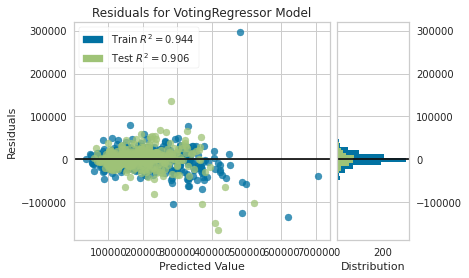

In [18]:
plot_model(blend_all)

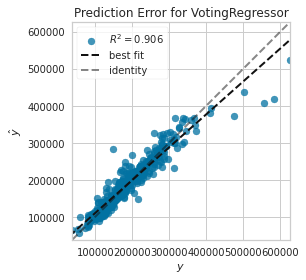

In [19]:
plot_model(blend_all, plot = 'error')

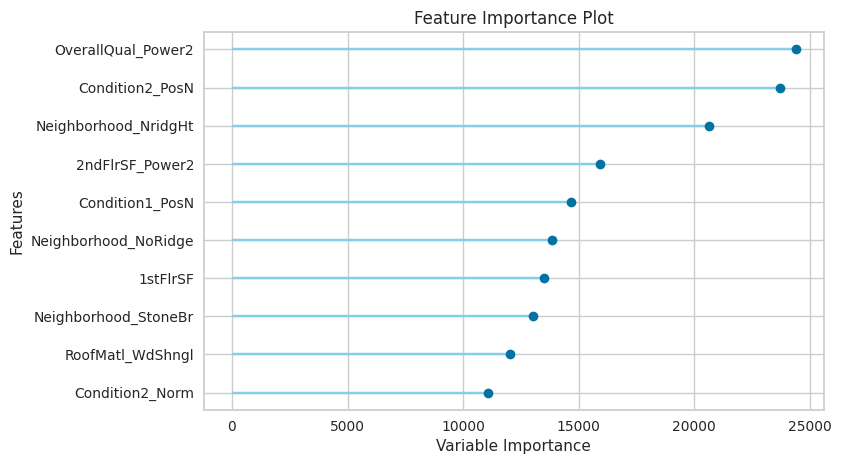

In [20]:
plot_model(br, plot = 'feature')

In [21]:
predict_model(blend_all)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,14548.6245,536723251.0041,23167.2884,0.9063,0.1115,0.0817


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,-1.272361e-07,-0.083283,0.636739,-0.514616,1.006072,0.425879,2.0,2.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,222500,221827.380280
1,-4.328227e-01,-0.073642,-1.471727,-3.141731,-2.291676,-0.573652,1.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87000,95548.280684
2,-1.728379e+00,-0.706573,0.636739,-0.514616,1.104025,0.076043,2.0,2.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130000,145079.461645
3,2.612252e-01,-0.058420,0.636739,0.361089,0.908119,-0.573652,1.0,2.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,274300,251368.481536
4,-4.328227e-01,0.061326,-0.768905,0.361089,-0.822382,-0.573652,1.0,2.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000,133292.812594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,-4.328227e-01,-0.349465,-0.066083,1.236794,-1.834562,-0.573652,1.0,2.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,127000,128072.252875
435,-8.955212e-01,-0.438970,-0.768905,-1.390321,-0.528524,-0.573652,1.0,2.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,93000,99477.131624
436,4.925745e-01,-0.008695,1.339561,-0.514616,1.136676,0.414773,2.0,2.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,275500,282677.619307
437,7.239237e-01,0.030375,0.636739,-0.514616,1.071374,1.047809,2.0,2.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,284000,279653.834876


In [22]:
final_blender = finalize_model(blend_all)

/home/yjjo/venv_AutoML_pycaret/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/yjjo/venv_AutoML_pycaret/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/yjjo/venv_AutoML_pycaret/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

In [23]:
predictions = predict_model(final_blender, data = df_test)
predictions.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,118522.448446
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,163469.608615
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,185734.645539
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,192213.097649
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,203013.148505


In [24]:
submission['SalePrice'] = predictions['Label']
print(submission[:10])
submission.to_csv('using_pycaret.csv')

          SalePrice
Id                 
1461  118522.448446
1462  163469.608615
1463  185734.645539
1464  192213.097649
1465  203013.148505
1466  173507.163977
1467  174188.891534
1468  163978.398956
1469  195328.238882
1470  121031.222961
